In [1]:
import numpy as np
from numpy import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import sys 
import shutil
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import read_csv
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
from pandas import DataFrame
from pandas import DataFrame
import sktime
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from scipy.signal import find_peaks
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Data location
pathON="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/ON_data/"
pathOFF="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/interpo_ONOFF/Luigino/OFF_data/"

In [3]:
#Storing in a list the adresses of all the data files in the notebook

data_files_ON=[]
file_names_ON=[]

data_files_OFF=[]
file_names_OFF=[]
data_files_ALL=[]
file_names_ALL=[]

#Storing in a list the adresses of all the data files in the notebook
for filename in os.listdir(pathOFF):
    f = os.path.join(pathOFF,filename)
    if os.path.isfile(f):
        data_files_OFF.append(f)
        file_names_OFF.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)
for filename in os.listdir(pathON):
    f = os.path.join(pathON,filename)
    if os.path.isfile(f):
        data_files_ON.append(f)
        file_names_ON.append(filename)
        data_files_ALL.append(f)
        file_names_ALL.append(filename)     

In [4]:
# Using data_files with only the 36 binning
Filter=True
binning=37


if Filter==True:
    
    idx_OFF=[]
    idx_ON=[]
    dataON=[]
    dataOFF=[]
    for i in range(len(data_files_OFF)):
        dataframe = pd.read_csv(data_files_OFF[i])
        lg = len(dataframe)
        
        if lg==binning:
            idx_OFF.append(i)
    
    for i in range(len(data_files_ON)):
        dataframe = pd.read_csv(data_files_ON[i])
        lg = len(dataframe)
        if lg==binning:
            idx_ON.append(i)


    for i in range(len(idx_OFF)):

        a=idx_OFF[i]
        dataOFF.append(data_files_OFF[a])
    for i in range(len(idx_ON)):

        a=idx_ON[i]
        dataON.append(data_files_ON[a])

idx = idx_OFF+idx_ON


In [632]:


def peak_study(array,time,delta_array):
    
    indices = find_peaks(array)
    indices=np.delete(indices,-1)
    y=[array[j] for j in indices]
    x=[time[j] for j in indices]
    y_err=[delta_array[j] for j in indices]
    
    x=np.hstack(x)
    y=np.hstack(y)
    y_err=np.hstack(y_err)
    
    scaler = MinMaxScaler()
    y=y.reshape(-1,1)
    scaler.fit(y)
    y=scaler.transform(y) 

    
    min_max_peak= abs(max(y)-min(y))
#     arr=[1,-1]
#     for i in range(len(y)):
#         if np.isnan(y[i])==False:
#             error=y_err[i]
#             choice=np.random.choice(arr,1)
#             if choice ==1:
#                 y[i]=y[i]+error
#             if choice==-1:
#                 y[i]=y[i]-error
    mean_peaks=np.mean(y)  
    scaler = MinMaxScaler()
    y=y.reshape(-1,1)
    scaler.fit(y)
    y=scaler.transform(y) 
    std_peaks=np.std(y)
 

    copy_flux=y.copy()
    copy_time=x.copy()
    a=np.argmax(copy_flux)
    ymax1=copy_flux[a]
    tmax1=time[a]
    
    copy_time=np.delete(copy_time,a)
    copy_flux=np.delete(copy_flux,a)
    a=np.argmax(copy_flux)
    ymax2=copy_flux[a]
    tmax2=copy_time[a]
    
    one_to_second_flux=abs(ymax1-ymax2)
    one_to_second_time=abs(tmax1-tmax2)
    
    peak_magnitudes=y
    nb_peaks=len(y)
    delta_energy_arr=[]
    delta_time_arr=[]
    
    for i in range(nb_peaks-1):
        
        delta = x[i+1]-x[i]
        delta_energy=abs(y[i+1]-y[i])
        
        delta_time_arr.append(delta)
        delta_energy_arr.append(delta_energy)
        
    delay_std=np.std(delta_time_arr)
    max_time_delay=max(delta_time_arr)
    min_time_delay=min(delta_time_arr)
    NG_diff_mean_peaks=np.mean(delta_energy_arr)
    max_diff_mean_peaks=max(y)-np.mean(y)
    min_diff_mean_peaks=min(y)-np.mean(y)
    peaks_time_delay=np.mean(delta_time_arr)

    
#     std_peaks=np.std(y-np.mean(baseline))
    
    var_peaks=np.var(y)
    mean_arr=np.mean(array)
    maxi=max(array)
    mini=min(array)
    amplitude=max(array)-min(array)
    std=np.std(array)
        
    return nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline


In [790]:

def peak_study(array,time,delta_array):    

    
    indices = find_peaks(array)
    indices=np.delete(indices,-1)
    y=[array[j] for j in indices]
    x=[time[j] for j in indices]
    y_err=[delta_array[j] for j in indices]
    

    
    x=np.hstack(x)
    y=np.hstack(y)
    y_err=np.hstack(y_err)
    
    #Scaled to peaks
    scaler = MinMaxScaler()
    y2=y.reshape(-1,1)
    scaler.fit(y2)
    y2=scaler.transform(y2) 
    
    std_peaks=np.std(y2)
    
    #Scaled array
    scaler = MinMaxScaler()
    array2=array.reshape(-1,1)
    scaler.fit(array2)
    array2=scaler.transform(array2)
    
    #Peaks scaled to array
    scaler = MinMaxScaler()
    y3=y.reshape(-1,1)
    scaler.fit(array2)
    y3=scaler.transform(y3) 
    

    
  
    baseline=np.delete(array2,indices[0])
    baseline=np.mean(baseline)
    median=np.median(array2)
    median_peak=np.median(y2)
    sorted_array2=np.sort(array2)
    maxi=array2[np.argmax(array2)]
    min_max_peak=sorted_array2[-1]-sorted_array2[-2]
#     arr=[1,-1]
#     for i in range(len(y)):
#         if np.isnan(y[i])==False:
#             error=y_err[i]
#             choice=np.random.choice(arr,1)
#             if choice ==1:
#                 y[i]=y[i]+error
#             if choice==-1:
#                 y[i]=y[i]-error
    mean_peaks=np.mean(y2)  
    scaler = MinMaxScaler()
    y=y.reshape(-1,1)
    scaler.fit(y)
    y=scaler.transform(y) 
    std_peaks=np.std(y)
 

    copy_flux=array2.copy()
    copy_time=time.copy()
    a=np.argmax(copy_flux)
    ymax1=copy_flux[a]
    tmax1=time[a]
    
    copy_flux[a]=0
    
    a=np.argmax(copy_flux)
    
    
    ymax2=copy_flux[a]
    tmax2=copy_time[a]
    
    one_to_second_flux=abs(ymax1-ymax2)
    one_to_second_time=abs(tmax1-tmax2)
    
    peak_magnitudes=y
    nb_peaks=len(y)
    delta_energy_arr=[]
    delta_time_arr=[]
    
    for i in range(nb_peaks-1):
        
        delta = x[i+1]-x[i]
        delta_energy=abs(y2[i+1]-y2[i])
        
        delta_time_arr.append(delta)
        delta_energy_arr.append(delta_energy)
        
    delay_std=np.std(delta_time_arr)
    max_time_delay=max(delta_time_arr)
    min_time_delay=min(delta_time_arr)
    NG_diff_mean_peaks=np.mean(delta_energy_arr)
    max_diff_mean_peaks=max(y2)-np.mean(y2)
    min_diff_mean_peaks=min(y2)-np.mean(y2)
    peaks_time_delay=np.mean(delta_time_arr)

    
#     std_peaks=np.std(y-np.mean(baseline))
    
    var_peaks=np.var(y2)
    mean_arr=np.mean(array)
    maxi=max(array)
    mini=min(array)
    amplitude=max(array)-min(array)
    std=np.std(array2)
        
    return nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline


In [489]:
#Machine learning section and testing

In [791]:
#Calculating features and putting them in arrays for each class

lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF

Labels=[]



nb_peaks_arr_flux =[]
peak_magnitudes_arr_flux =[]
peaks_time_delay_arr_flux =[]
std_peaks_arr_flux =[]
mean_peaks_arr_flux =[]

NG_diff_mean_peaks_arr_flux =[]
max_diff_mean_peaks_arr_flux =[]
min_diff_mean_peaks_arr_flux =[]
mean_arr_flux=[]
max_arr_flux=[]
min_arr_flux=[]
amplitude_flux=[]
std_flux=[]
one_two_flux=[]
one_two_time=[]
min_max=[]
min_deltaT=[]
max_deltaT=[]
deltaT_std=[]
BASEline=[]

for i in range(len(dataOFF)):
    
    dataframe=pd.read_csv(dataOFF[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    photon_idx=np.array(dataframe['Photon Index'])
    delta_index=np.array(dataframe['Delta Index'])
    delta_flux=np.array(dataframe['Delta Flux'])
    

    nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
                                                                                                                                           
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)

    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)
    Median.append(median)
    Median_peak.append(median_peak)
for i in range(len(dataON)):
    
    dataframe=pd.read_csv(dataON[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    photon_idx=np.array(dataframe['Photon Index'])
    delta_index=np.array(dataframe['Delta Index'])
    delta_flux=np.array(dataframe['Delta Flux'])

    nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std,baseline=peak_study(flux,mjd,delta_flux)
    
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)

    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
    BASEline.append(baseline)
    Median.append(median)
    Median_peak.append(median_peak)
#Creating labels
for i in range(lgOFF):
    
    Labels.append(int(0))
    
for i in range(lgON):
    Labels.append(int(1))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

In [712]:
nbfeatures=18

# F1 score:  0.7856898756374772
# Precision score: 0.7137353208740678
    
data_matrix=np.zeros((nbfeatures,lg))


#Best combination of  features for best performance of classification
data_matrix[0]=nb_peaks_arr_flux
data_matrix[1]=peaks_time_delay_arr_flux
data_matrix[2]=BASEline
data_matrix[3]=std_peaks_arr_flux

data_matrix[4]=deltaT_std
data_matrix[5]=min_deltaT
data_matrix[6]=max_deltaT

# Other features created by peak study function 

data_matrix[7]=mean_peaks_arr_flux
data_matrix[8]=min_max
data_matrix[9]=std_flux
data_matrix[10]=amplitude_flux
data_matrix[11]=mean_arr_flux
data_matrix[12]=min_arr_flux
data_matrix[13]=one_two_flux
data_matrix[14]=one_two_time

data_matrix[15]=NG_diff_mean_peaks_arr_flux
data_matrix[16]=max_diff_mean_peaks_arr_flux
data_matrix[17]=min_diff_mean_peaks_arr_flux





data_matrix=data_matrix.reshape((lg,nbfeatures))

C:\Users\pierr\AppData\Local\Temp\ipykernel_17216\3773760877.py:22: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  data_matrix[8]=min_max
C:\Users\pierr\AppData\Local\Temp\ipykernel_17216\3773760877.py:27: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  data_matrix[13]=one_two_flux
C:\Users\pierr\AppData\Local\Temp\ipykernel_17216\3773760877.py:31: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `n

In [429]:
nbfeatures=1


data_matrix=np.zeros((nbfeatures,lg))



data_matrix[0]=nb_peaks_arr_flux
# Accuracy for ON class:  24.318556443556442 %
# Accuracy for OFF class:  79.27348603239793 %
# False Positive rate:  75.68144355644355 %
# False Negative rate:  20.726513967602077 %
# F1 score:  0.09235980547950913
# Precision score: 0.06502573066455322

# data_matrix[0]=peaks_time_delay_arr_flux
# Accuracy for ON class:  19.726773226773226 %
# Accuracy for OFF class:  79.21917055379201 %
# False Positive rate:  80.27322677322677 %
# False Negative rate:  20.78082944620798 %
# F1 score:  0.06274988921758283
# Precision score: 0.037668844696988765

# data_matrix[0]=BASEline
# Accuracy for ON class:  48.25757575757576 %
# Accuracy for OFF class:  50.18117227220857 %
# False Positive rate:  51.74242424242425 %
# False Negative rate:  49.81882772779144 %
# F1 score:  0.032377219607605645
# Precision score: 0.01675268664546762

# data_matrix[0]=std_peaks_arr_flux
# Accuracy for ON class:  8.022297147297147 %
# Accuracy for OFF class:  96.89239548173694 %
# False Positive rate:  91.97770285270283 %
# False Negative rate:  3.107604518263074 %
# F1 score:  0.08948266126676921
# Precision score: 0.12521458933223636

# data_matrix[0]=deltaT_std
# Accuracy for ON class:  3.3939393939393936 %
# Accuracy for OFF class:  93.45631385931846 %
# False Positive rate:  96.6060606060606 %
# False Negative rate:  6.543686140681537 %
# F1 score:  0.017644006227296317
# Precision score: 0.01217948717948718

# data_matrix[0]=min_deltaT
# Accuracy for ON class:  7.9475108225108215 %
# Accuracy for OFF class:  99.32988628287771 %
# False Positive rate:  92.05248917748916 %
# False Negative rate:  0.6701137171222966 %
# F1 score:  0.12504835807467385
# Precision score: 0.3733333333333333

# data_matrix[0]=max_deltaT
# Accuracy for ON class:  17.64470251970252 %
# Accuracy for OFF class:  75.1284293542847 %
# False Positive rate:  82.35529748029748 %
# False Negative rate:  24.871570645715288 %
# F1 score:  0.05657584009415042
# Precision score: 0.03606675999653293


# # Other features created by peak study function 

# data_matrix[0]=mean_peaks_arr_flux
# Accuracy for ON class:  39.026806526806524 %
# Accuracy for OFF class:  60.15059574618757 %
# False Positive rate:  60.973193473193476 %
# False Negative rate:  39.84940425381244 %
# F1 score:  0.03840000645666368
# Precision score: 0.06295858960717653


# data_matrix[0]=min_max
# Accuracy for ON class:  50.0 %
# Accuracy for OFF class:  50.451957910184305 %
# False Positive rate:  50.0 %
# False Negative rate:  49.548042089815695 %
# F1 score:  0.0337442684361289
# Precision score: 0.017463524547375105

# data_matrix[0]=std_flux
# Accuracy for ON class:  49.23076923076923 %
# Accuracy for OFF class:  50.42387789408423 %
# False Positive rate:  50.76923076923077 %
# False Negative rate:  49.57612210591577 %
# F1 score:  0.03306402811085808
# Precision score: 0.01710873536282236
    
# data_matrix[0]=amplitude_flux
# Accuracy for ON class:  46.655011655011656 %
# Accuracy for OFF class:  50.54360551124246 %
# False Positive rate:  53.34498834498834 %
# False Negative rate:  49.45639448875754 %
# F1 score:  0.03154693999233401
# Precision score: 0.016327602626392858

# data_matrix[0]=mean_arr_flux
# Accuracy for ON class:  50.0 %
# Accuracy for OFF class:  50.24215014913736 %
# False Positive rate:  50.0 %
# False Negative rate:  49.75784985086264 %
# F1 score:  0.033497395727781765
# Precision score: 0.017331434273551112

# data_matrix[0]=min_arr_flux
# Accuracy for ON class:  38.25757575757576 %
# Accuracy for OFF class:  60.06051451066556 %
# False Positive rate:  61.74242424242425 %
# False Negative rate:  39.93948548933443 %
# F1 score:  0.024961461788657255
# Precision score: 0.012902418774784699

# data_matrix[0]=one_two_flux
# Accuracy for ON class:  1.2698412698412698 %
# Accuracy for OFF class:  96.46576585724196 %
# False Positive rate:  98.73015873015873 %
# False Negative rate:  3.5342341427580464 %
# F1 score:  0.01359447004608295
# Precision score: 0.01588235294117647

# data_matrix[0]=one_two_time
# Accuracy for ON class:  21.76956376956377 %
# Accuracy for OFF class:  81.65985240951477 %
# False Positive rate:  78.23043623043624 %
# False Negative rate:  18.340147590485216 %
# F1 score:  0.07694264711691903
# Precision score: 0.04869273203809952

# data_matrix[0]=NG_diff_mean_peaks_arr_flux
# Accuracy for ON class:  4.074786324786325 %
# Accuracy for OFF class:  96.61858297474356 %
# False Positive rate:  95.92521367521366 %
# False Negative rate:  3.381417025256437 %
# F1 score:  0.0425066915655151
# Precision score: 0.04801910507792861


# data_matrix[0]=max_diff_mean_peaks_arr_flux
# Accuracy for ON class:  0.0 %
# Accuracy for OFF class:  96.68091694453497 %
# False Positive rate:  100.0 %
# False Negative rate:  3.319083055465041 %
# F1 score:  0.0
# Precision score: 0.

# data_matrix[0]=min_diff_mean_peaks_arr_flux
# Accuracy for ON class:  0.0 %
# Accuracy for OFF class:  96.68091694453497 %
# False Positive rate:  100.0 %
# False Negative rate:  3.319083055465041 %
# F1 score:  0.0
# Precision score: 0.0





data_matrix=data_matrix.reshape((lg,nbfeatures))

In [825]:
# F1 score:  0.8043862284979169
# Precision score: 0.724161599270295

import cesium
from cesium import featurize
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
ON_accuracy=[]
OFF_accuracy=[]
fscore=[]
prec_score=[]
FPOS=[]
FNEG= []
bad_ON=[]
iterations=20
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF
weight_for_0 = (1 / lgOFF) * (lg / 2.0)
weight_for_1 = (1 / lgON) * (lg / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

for i in  range(iterations):
                 
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, Labels, test_size=0.3, random_state=i)


    model = RandomForestClassifier(n_estimators=2000, max_features="auto",
                                          random_state=0,class_weight =class_weight)
    Labels=np.hstack(Labels)
    model.fit(x_train, y_train)
    prediction= model.predict(x_test)
    on_score=0
    on_nbs=0
    off_nbs=0
    off_score=0
    foff=0
    fon=0

    for i in range(len(y_test)):
        if y_test[i]==1 :
            on_nbs+=1
            if prediction[i]==1:
                on_score+=1
            else : 
                fon+=1
                bad_ON.append(i)
        if y_test[i]==0 :
            off_nbs+=1
            if prediction[i]==0:
                off_score+=1 
            else:
                foff+=1
    if on_nbs>0:    
        ON_accuracy.append(100*(on_score/on_nbs))
        FPOS.append(100*(fon/on_nbs))
    OFF_accuracy.append(100*(off_score/off_nbs))
    FNEG.append(100*(foff/off_nbs))
    f1= f1_score(y_test,prediction)
    score=precision_score(y_test,prediction)
    fscore.append(f1)
    prec_score.append(score)
print("Accuracy for ON class: ",np.mean(ON_accuracy) ,"%")
print("Accuracy for OFF class: ",np.mean(OFF_accuracy) ,"%")
print("False Positive rate: ",np.mean(FPOS) ,"%")
print("False Negative rate: ",np.mean(FNEG) ,"%")
print("F1 score: ",np.mean(fscore))
print("Precision score:",np.mean(prec_score))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Accuracy for ON class:  88.7112001560531 %
Accuracy for OFF class:  98.58089356367078 %
False Positive rate:  11.2887998439469 %
False Negative rate:  1.419106436329233 %
F1 score:  0.7989901106817106
Precision score: 0.7353583536103895


In [823]:
dens = model.predict_proba(x_test)
OFFF=[]
ONN=[]
for i in range(len(dens)):
    
        
        OFFF.append(dens[i][0])
        
        ONN.append(dens[i][1])
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


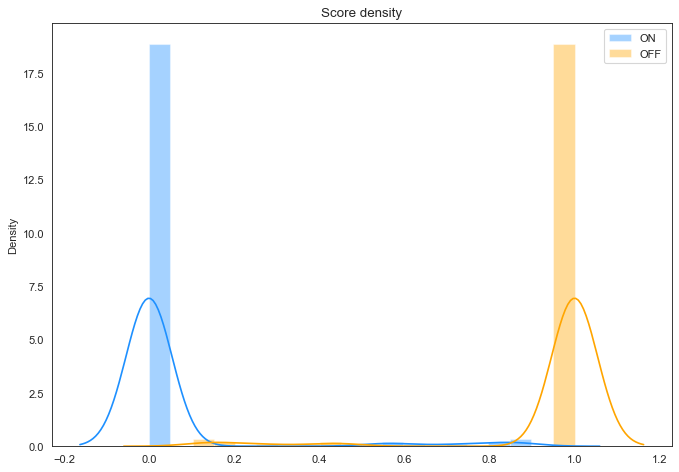

In [826]:
import seaborn as sns
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(ONN, color="dodgerblue", label="ON")
sns.distplot(OFFF, color="orange", label="OFF")
plt.title("Score density")
plt.legend();

In [748]:
std_peaks_arr_flux=np.hstack(std_peaks_arr_flux)
one_two_flux=np.hstack(one_two_flux)
nb_peaks_arr_flux=np.hstack(nb_peaks_arr_flux)
peaks_time_delay_arr_flux=np.hstack(peaks_time_delay_arr_flux)
BASEline=np.hstack(BASEline)
mean_peaks_arr_flux=np.hstack(mean_peaks_arr_flux)
max_diff_mean_peaks_arr_flux=np.hstack(max_diff_mean_peaks_arr_flux)
NG_diff_mean_peaks_arr_flux=np.hstack(NG_diff_mean_peaks_arr_flux)
one_two_time=np.hstack(one_two_time)
min_arr_flux=np.hstack(min_arr_flux)
mean_peaks_arr_flux=np.hstack(mean_peaks_arr_flux)
amplitude_flux=np.hstack(amplitude_flux)
std_flux=np.hstack(std_flux)
mean_arr_flux=np.hstack(mean_arr_flux)
min_max=np.hstack(min_max)
max_deltaT=np.hstack(max_deltaT)
min_max=np.hstack(min_max)
deltaT_std=np.hstack(deltaT_std)
min_max=np.hstack(min_max)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


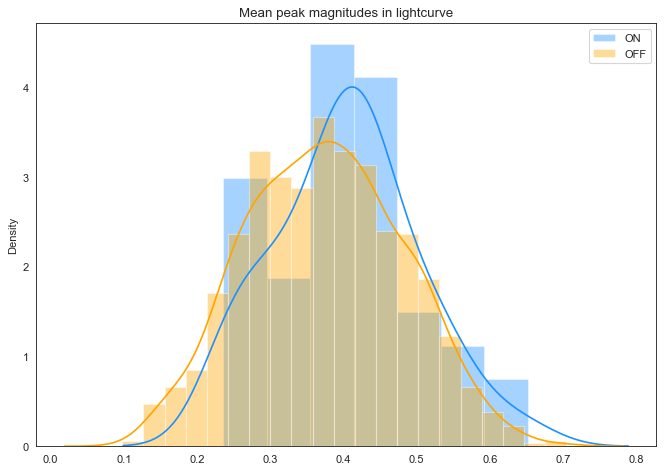

In [749]:
import seaborn as sns
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Mean peak magnitudes in lightcurve")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


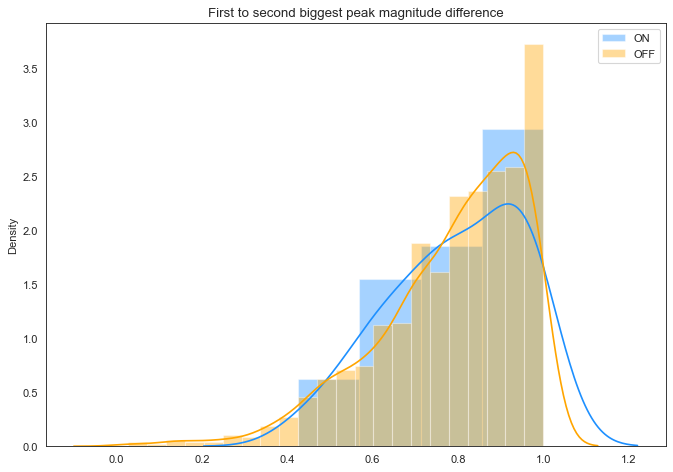

In [769]:

import seaborn as sns
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(one_two_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(one_two_flux[:lgOFF], color="orange", label="OFF")
plt.title("First to second biggest peak magnitude difference")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


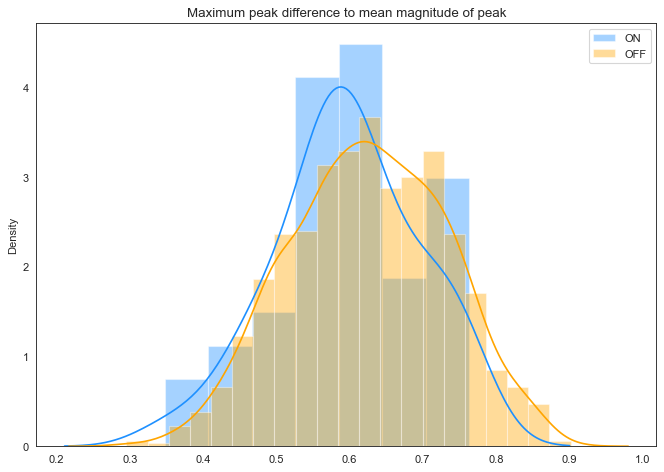

In [785]:

sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(max_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(max_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Maximum peak difference to mean magnitude of peak")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


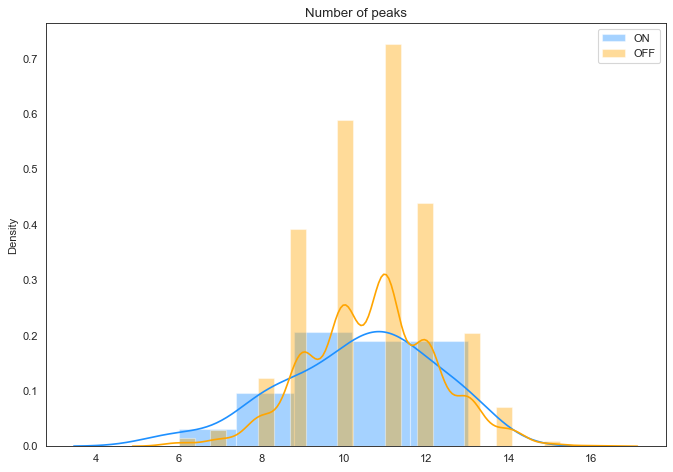

In [770]:

sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(nb_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(nb_peaks_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Number of peaks")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


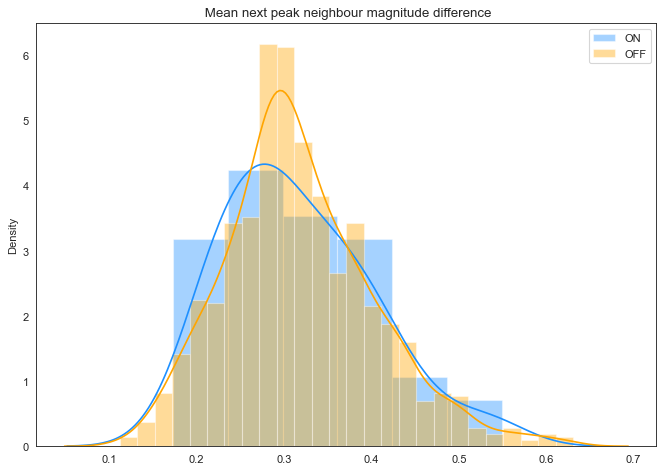

In [771]:

sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(NG_diff_mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(NG_diff_mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title(" Mean next peak neighbour magnitude difference")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


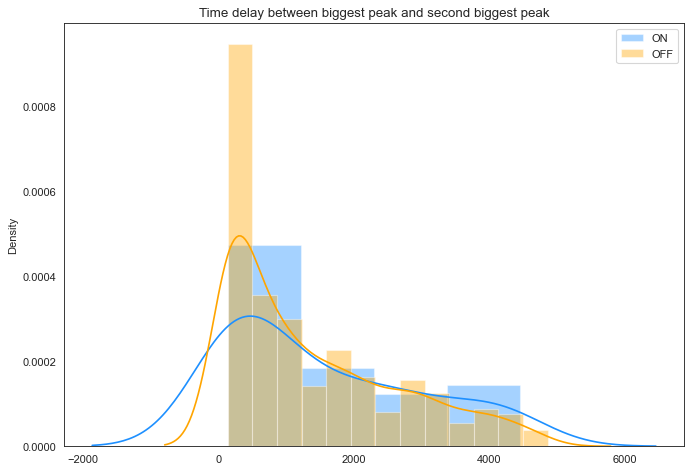

In [772]:

sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(one_two_time[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(one_two_time[:lgOFF], color="orange", label="OFF")
plt.title("Time delay between biggest peak and second biggest peak")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


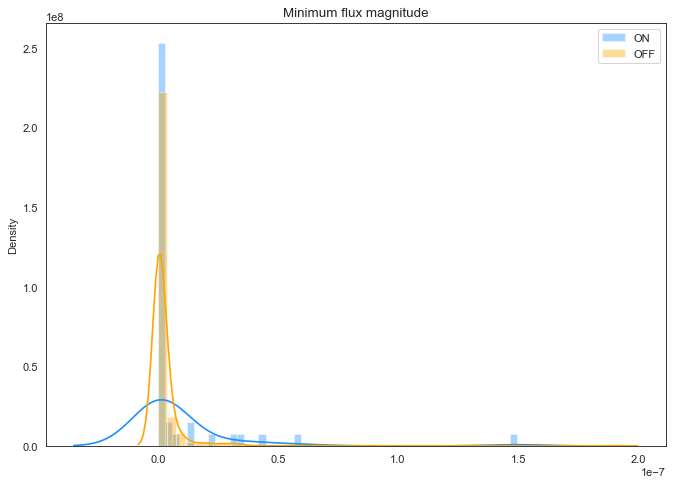

In [773]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(min_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(min_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Minimum flux magnitude")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


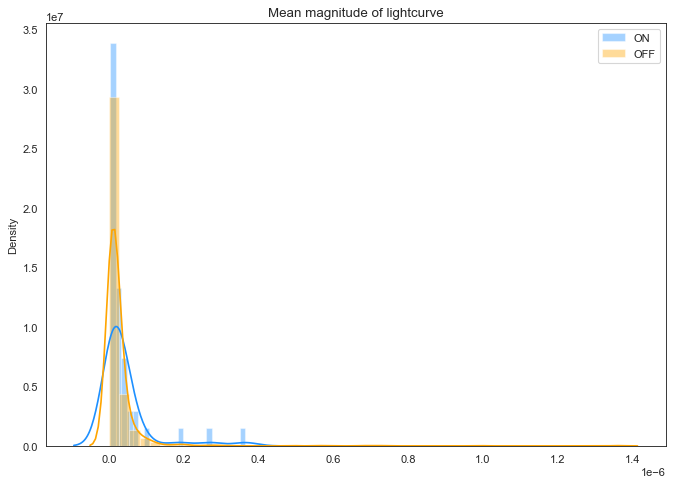

In [774]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(mean_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(mean_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Mean magnitude of lightcurve")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


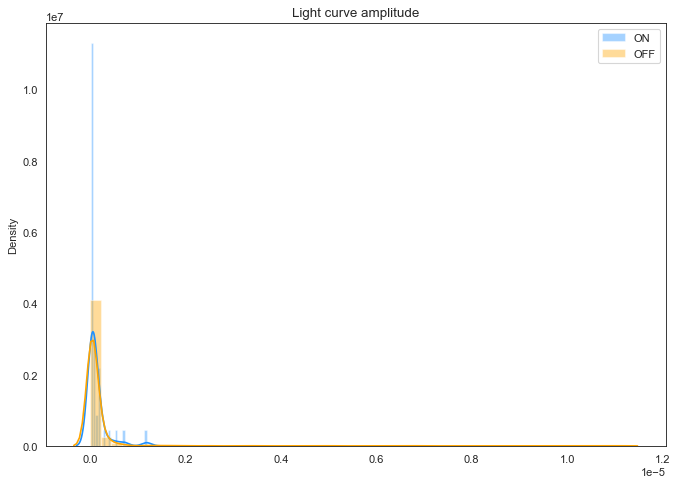

In [775]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(amplitude_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(amplitude_flux[:lgOFF], color="orange", label="OFF")
plt.title("Light curve amplitude")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


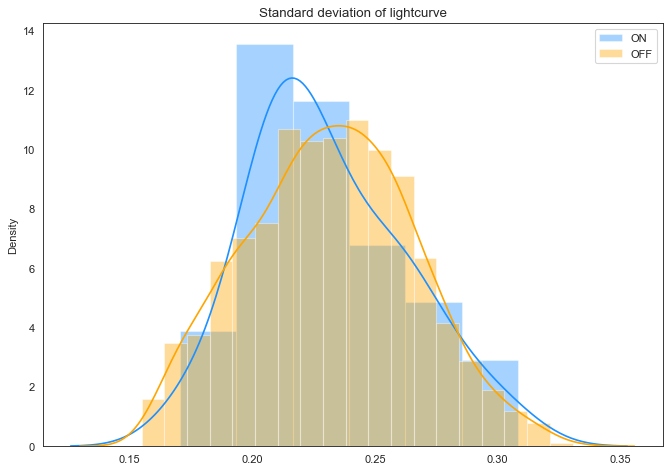

In [776]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(std_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(std_flux[:lgOFF], color="orange", label="OFF")
plt.title("Standard deviation of lightcurve")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


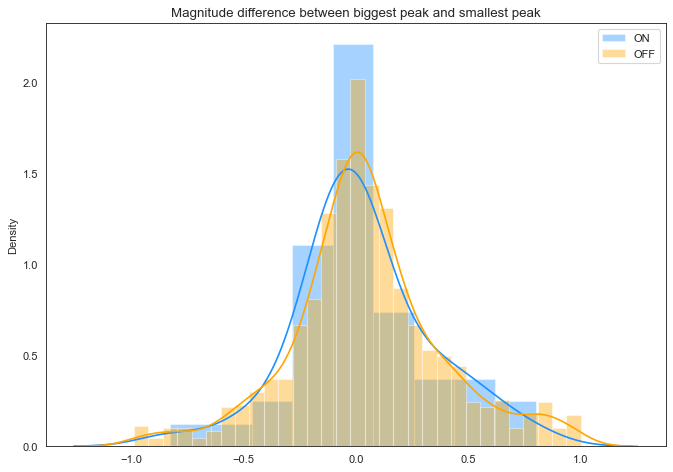

In [793]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(min_max[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(min_max[:lgOFF], color="orange", label="OFF")
plt.title("Magnitude difference between biggest peak and smallest peak")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


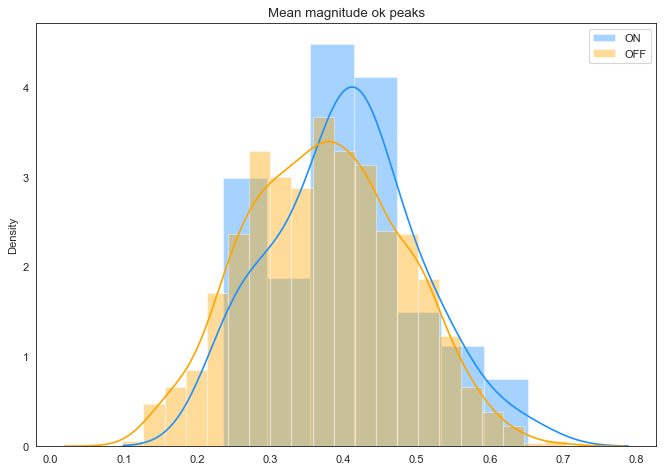

In [778]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(mean_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(mean_peaks_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Mean magnitude ok peaks")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


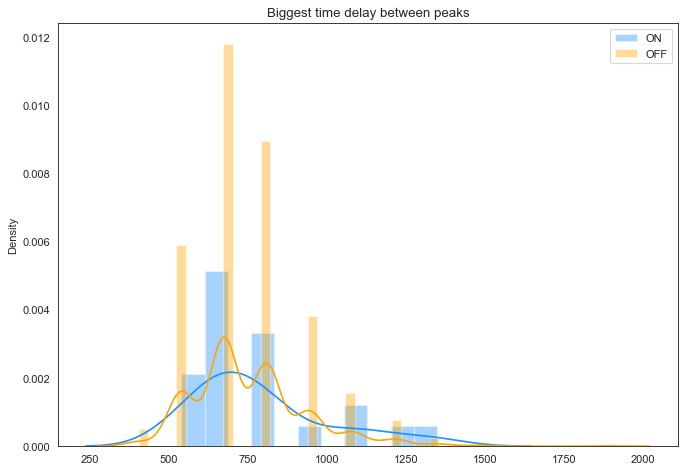

In [779]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(max_deltaT[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(max_deltaT[:lgOFF], color="orange", label="OFF")
plt.title("Biggest time delay between peaks")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


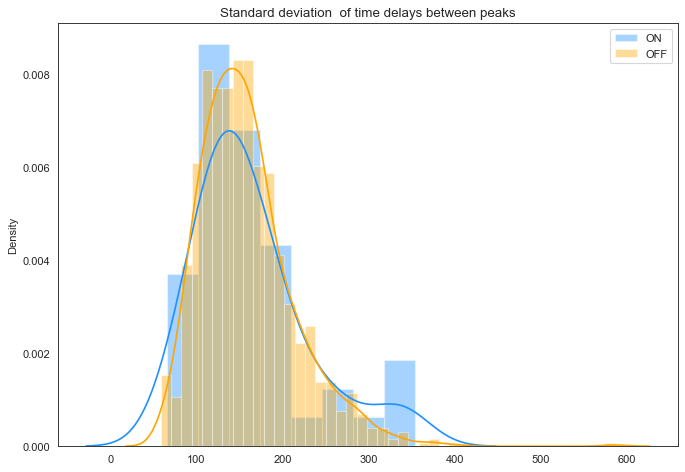

In [780]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(deltaT_std[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(deltaT_std[:lgOFF], color="orange", label="OFF")
plt.title("Standard deviation  of time delays between peaks")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


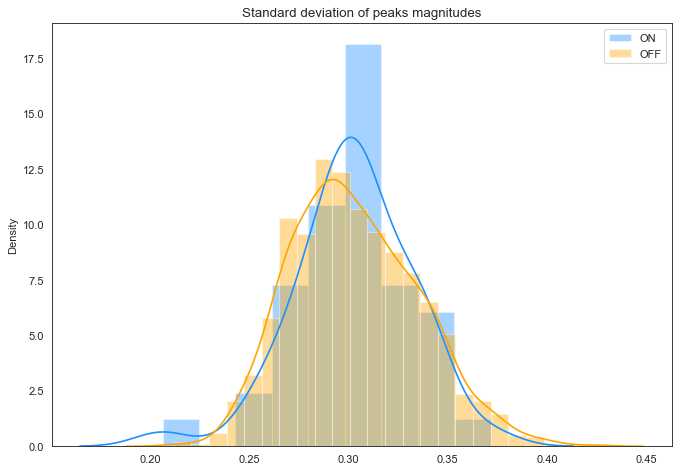

In [781]:
sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(std_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(std_peaks_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Standard deviation of peaks magnitudes")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


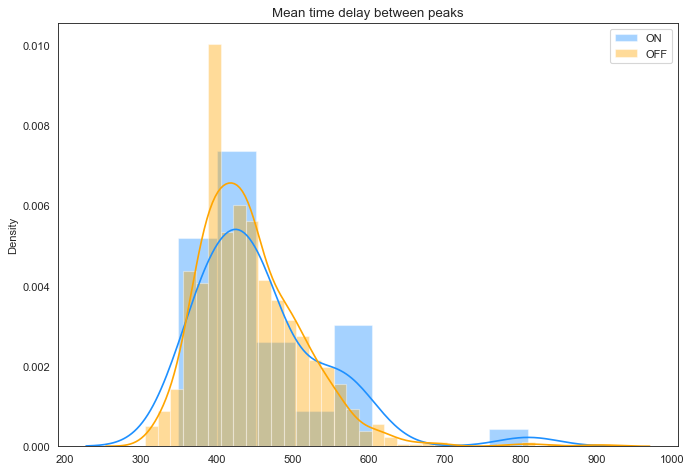

In [782]:

sns.set_style("white")
BASEline
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(peaks_time_delay_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(peaks_time_delay_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Mean time delay between peaks")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


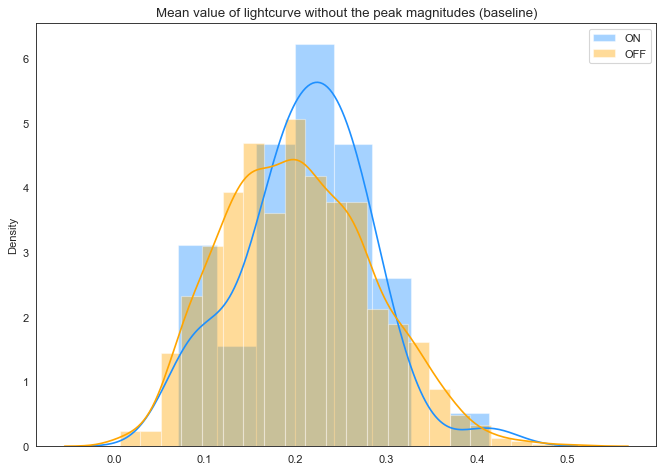

In [783]:

sns.set_style("white")

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(BASEline[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(BASEline[:lgOFF], color="orange", label="OFF")
plt.title("Mean value of lightcurve without the peak magnitudes (baseline)")
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


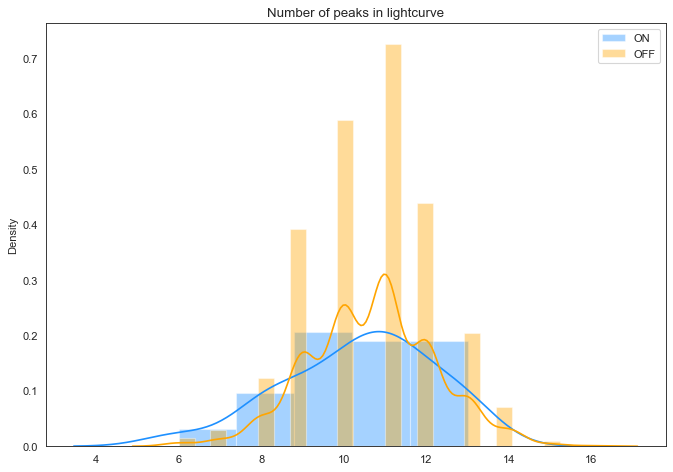

In [784]:

sns.set_style("white")
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(nb_peaks_arr_flux[lgOFF:], color="dodgerblue", label="ON")
sns.distplot(nb_peaks_arr_flux[:lgOFF], color="orange", label="OFF")
plt.title("Number of peaks in lightcurve")
plt.legend();

In [636]:
nbfeatures=3

# F1 score:  0.7856898756374772
# Precision score: 0.7137353208740678
    
data_matrix=np.zeros((nbfeatures,lg))


#Best combination of  features for best performance of classification

# Other features created by peak study function 


data_matrix[0]=min_max
data_matrix[1]=one_two_flux
data_matrix[2]=min_diff_mean_peaks_arr_flux





data_matrix=data_matrix.reshape((lg,nbfeatures))


# min_diff_mean_peaks_arr_flux
# min_max
# one_two_flux

C:\Users\pierr\AppData\Local\Temp\ipykernel_17216\870070796.py:15: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  data_matrix[1]=one_two_flux
C:\Users\pierr\AppData\Local\Temp\ipykernel_17216\870070796.py:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  data_matrix[2]=min_diff_mean_peaks_arr_flux


In [637]:
import cesium
from cesium import featurize
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
ON_accuracy=[]
OFF_accuracy=[]
fscore=[]
prec_score=[]
FPOS=[]
FNEG= []
bad_ON=[]
iterations=5
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF
weight_for_0 = (1 / lgOFF) * (lg / 2.0)
weight_for_1 = (1 / lgON) * (lg / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

for i in  range(iterations):
                 
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, Labels, test_size=0.2, random_state=i)


    model = RandomForestClassifier(n_estimators=2000, max_features="auto",
                                          random_state=i,class_weight =class_weight)
    Labels=np.hstack(Labels)
    model.fit(x_train, y_train)
    prediction= model.predict(x_test)
    on_score=0
    on_nbs=0
    off_nbs=0
    off_score=0
    foff=0
    fon=0

    for i in range(len(y_test)):
        if y_test[i]==1 :
            on_nbs+=1
            if prediction[i]==1:
                on_score+=1
            else : 
                fon+=1
                bad_ON.append(i)
        if y_test[i]==0 :
            off_nbs+=1
            if prediction[i]==0:
                off_score+=1 
            else:
                foff+=1
    if on_nbs>0:    
        ON_accuracy.append(100*(on_score/on_nbs))
        FPOS.append(100*(fon/on_nbs))
    OFF_accuracy.append(100*(off_score/off_nbs))
    FNEG.append(100*(foff/off_nbs))
    f1= f1_score(y_test,prediction)
    score=precision_score(y_test,prediction)
    fscore.append(f1)
    prec_score.append(score)
print("Accuracy for ON class: ",np.mean(ON_accuracy) ,"%")
print("Accuracy for OFF class: ",np.mean(OFF_accuracy) ,"%")
print("False Positive rate: ",np.mean(FPOS) ,"%")
print("False Negative rate: ",np.mean(FNEG) ,"%")
print("F1 score: ",np.mean(fscore))
print("Precision score:",np.mean(prec_score))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy for ON class:  0.0 %
Accuracy for OFF class:  99.8169250104734 %
False Positive rate:  100.0 %
False Negative rate:  0.18307498952660245 %
F1 score:  0.0
Precision score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [809]:
import cesium
from cesium import featurize

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
ON_accuracy=[]
OFF_accuracy=[]
fscore=[]
FPOS=[]
FNEG= []
bad_ON=[]
iterations=3
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF
weight_for_0 = (1 / lgOFF) * (lg / 2.0)
weight_for_1 = (1 / lgON) * (lg / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

for i in  range(iterations):
                 
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, Labels, test_size=0.3, random_state=i)


    model = KNeighborsClassifier(2)
    Labels=np.hstack(Labels)
    model.fit(x_train, y_train)
    prediction= model.predict(x_test)
    on_score=0
    on_nbs=0
    off_nbs=0
    off_score=0
    foff=0
    fon=0

    for i in range(len(y_test)):
        if y_test[i]==1 :
            on_nbs+=1
            if prediction[i]==1:
                on_score+=1
                
            else : 
                fon+=1
                bad_ON.append(i)
        if y_test[i]==0 :
            off_nbs+=1
            if prediction[i]==0:
                off_score+=1 
            else:
                foff+=1
    if on_nbs>0:    
        ON_accuracy.append(100*(on_score/on_nbs))
        FPOS.append(100*(fon/on_nbs))
    OFF_accuracy.append(100*(off_score/off_nbs))
    FNEG.append(100*(foff/off_nbs))
    f1= f1_score(y_test,prediction)
    score=precision_score(y_test,prediction)
    fscore.append(f1)
    prec_score.append(score)
print("Accuracy for ON class: ",np.mean(ON_accuracy) ,"%")
print("Accuracy for OFF class: ",np.mean(OFF_accuracy) ,"%")
print("False Positive rate: ",np.mean(FPOS) ,"%")
print("False Negative rate: ",np.mean(FNEG) ,"%")
print("F1 score: ",np.mean(fscore))
print("Precision score:",np.mean(prec_score))

Accuracy for ON class:  78.21969696969697 %
Accuracy for OFF class:  98.4814167662202 %
False Positive rate:  21.78030303030303 %
False Negative rate:  1.518583233779794 %
F1 score:  0.7151916184174247
Precision score: 0.7108935379002268


In [810]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score


ON_accuracy=[]
OFF_accuracy=[]
fscore=[]
FPOS=[]
FNEG= []
bad_ON=[]
iterations=5
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF
weight_for_0 = (1 / lgOFF) * (lg / 2.0)
weight_for_1 = (1 / lgON) * (lg / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

for i in range(iterations):
                 
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, Labels, test_size=0.3, random_state=i)


    
    model = AdaBoostClassifier(n_estimators=2000, random_state=0)
    model.fit(x_train, y_train)
    Labels=np.hstack(Labels)
    prediction= model.predict(x_test)
    on_score=0
    on_nbs=0
    off_nbs=0
    off_score=0
    foff=0
    fon=0

    for i in range(len(y_test)):
        if y_test[i]==1 :
            on_nbs+=1
            if prediction[i]==1:
                on_score+=1
                
            else : 
                fon+=1
                bad_ON.append(i)
        if y_test[i]==0 :
            off_nbs+=1
            if prediction[i]==0:
                off_score+=1 
            else:
                foff+=1
    if on_nbs>0:    
        ON_accuracy.append(100*(on_score/on_nbs))
        FPOS.append(100*(fon/on_nbs))
    OFF_accuracy.append(100*(off_score/off_nbs))
    FNEG.append(100*(foff/off_nbs))
    f1= f1_score(y_test,prediction)
    score=precision_score(y_test,prediction)
    fscore.append(f1)
    prec_score.append(score)
print("Accuracy for ON class: ",np.mean(ON_accuracy) ,"%")
print("Accuracy for OFF class: ",np.mean(OFF_accuracy) ,"%")
print("False Positive rate: ",np.mean(FPOS) ,"%")
print("False Negative rate: ",np.mean(FNEG) ,"%")
print("F1 score: ",np.mean(fscore))
print("Precision score:",np.mean(prec_score))

Accuracy for ON class:  83.97727272727272 %
Accuracy for OFF class:  98.30021640608634 %
False Positive rate:  16.022727272727273 %
False Negative rate:  1.6997835939136698 %
F1 score:  0.7345842490842491
Precision score: 0.6961539763313219


Mean standard deviation of peak magnitudes for OFF class:  3.380058719733173e-08
Mean number of peaks in lightsource curve for OFF class:  10.685844748858447
Mean time difference between peaks for OFF class:  445.10171326792533
  


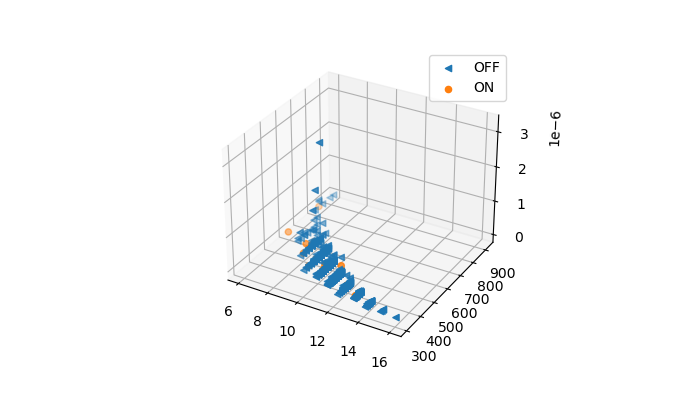

Mean standard deviation of peak magnitudes for ON class:  3.46862360276507e-08
Mean number of peaks in lightsource curve for ON class:  10.377777777777778
Mean time difference between peaks for ON class:  457.5433313345466


In [22]:
#Obtaining  mean values of features for each class
%matplotlib widget
from mpl_toolkits import mplot3d
 
lgON=len(dataON)
lgOFF=len(dataOFF)
lg=lgON+lgOFF

Labels=[]



nb_peaks_arr_flux =[]
peak_magnitudes_arr_flux =[]
peaks_time_delay_arr_flux =[]
std_peaks_arr_flux =[]
mean_peaks_arr_flux =[]

NG_diff_mean_peaks_arr_flux =[]
max_diff_mean_peaks_arr_flux =[]
min_diff_mean_peaks_arr_flux =[]
mean_arr_flux=[]
max_arr_flux=[]
min_arr_flux=[]
amplitude_flux=[]
std_flux=[]
one_two_flux=[]
one_two_time=[]
min_max=[]
min_deltaT=[]
max_deltaT=[]
deltaT_std=[]
for i in range(len(dataOFF)):
    
    dataframe=pd.read_csv(dataOFF[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    photon_idx=np.array(dataframe['Photon Index'])
    delta_index=np.array(dataframe['Delta Index'])
    delta_flux=np.array(dataframe['Delta Flux'])
    
    nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std=peak_study(flux,mjd,delta_flux)

                                                                                                                                           
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)

    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
#Creating labels
for i in range(lgOFF):
    
    Labels.append(int(0))
    
for i in range(lgON):
    Labels.append(int(1))


z=std_peaks_arr_flux
x=nb_peaks_arr_flux
y=peaks_time_delay_arr_flux
fig = plt.figure(figsize = (7, 4))
ax = plt.axes(projection ="3d")
 
# Create Plot

ax.scatter3D(x, y, z, marker='<', s=20, label='OFF')

# plt.show()    

print("Mean standard deviation of peak magnitudes for OFF class: ",np.mean(std_peaks_arr_flux))
print("Mean number of peaks in lightsource curve for OFF class: ",np.mean(nb_peaks_arr_flux))
print("Mean time difference between peaks for OFF class: ",np.mean(peaks_time_delay_arr_flux))
print("  ")


Labels=[]



nb_peaks_arr_flux =[]
peak_magnitudes_arr_flux =[]
peaks_time_delay_arr_flux =[]
std_peaks_arr_flux =[]
mean_peaks_arr_flux =[]

NG_diff_mean_peaks_arr_flux =[]
max_diff_mean_peaks_arr_flux =[]
min_diff_mean_peaks_arr_flux =[]
mean_arr_flux=[]
max_arr_flux=[]
min_arr_flux=[]
amplitude_flux=[]
std_flux=[]
one_two_flux=[]
one_two_time=[]
min_max=[]
min_deltaT=[]
max_deltaT=[]
deltaT_std=[]
for i in range(len(dataON)):
    
    dataframe=pd.read_csv(dataON[i],index_col=[0])
    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    mjd=np.array(dataframe['MJD'])
    flux=np.array(dataframe['Flux'])
    photon_idx=np.array(dataframe['Photon Index'])
    delta_index=np.array(dataframe['Delta Index'])
    delta_flux=np.array(dataframe['Delta Flux'])

    nb_peaks,peak_magnitudes,peaks_time_delay,std_peaks,mean_peaks,NG_diff_mean_peaks,max_diff_mean_peaks,min_diff_mean_peaks,mean_arr,maxi,mini,amplitude,std,one_to_second_flux,one_to_second_time,min_max_peak,max_time_delay,min_time_delay,delay_std=peak_study(flux,mjd,delta_flux)
    nb_peaks_arr_flux.append(nb_peaks)
    peak_magnitudes_arr_flux.append(peak_magnitudes)
    peaks_time_delay_arr_flux.append(peaks_time_delay)
    std_peaks_arr_flux.append(std_peaks)
    mean_peaks_arr_flux.append(mean_peaks)

    NG_diff_mean_peaks_arr_flux.append(NG_diff_mean_peaks)
    max_diff_mean_peaks_arr_flux.append(max_diff_mean_peaks)
    min_diff_mean_peaks_arr_flux.append(min_diff_mean_peaks)
    
    mean_arr_flux.append(mean_arr)
    max_arr_flux.append(maxi)
    min_arr_flux.append(mini)
    amplitude_flux.append(amplitude)
    std_flux.append(std)
    one_two_flux.append(one_to_second_flux)
    one_two_time.append(one_to_second_time)
    min_max.append(min_max_peak)
    min_deltaT.append(min_time_delay)
    max_deltaT.append(max_time_delay)
    deltaT_std.append(delay_std)
#Creating labels
for i in range(lgOFF):
    
    Labels.append(int(0))
    
for i in range(lgON):
    Labels.append(int(1))
    
# fig = plt.figure()
# ax = plt.axes(projection="3d")

z=std_peaks_arr_flux
x=nb_peaks_arr_flux
y=peaks_time_delay_arr_flux

ax.scatter3D(x, y, z, marker='o', s=20, label='ON' );

# Add legend

ax.legend(loc=1)
 
# Show plot

plt.show()
    
print("Mean standard deviation of peak magnitudes for ON class: ",np.mean(std_peaks_arr_flux))
print("Mean number of peaks in lightsource curve for ON class: ",np.mean(nb_peaks_arr_flux))
print("Mean time difference between peaks for ON class: ",np.mean(peaks_time_delay_arr_flux))